## Seaborn 画图

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# sns.set_style("whitegrid")
tips = sns.load_dataset("tips")

In [2]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


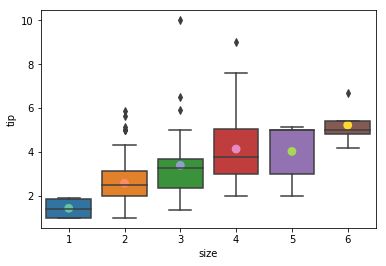

In [3]:
ax = sns.boxplot(x="size", y="tip", data=tips)
ax = sns.pointplot(x="size",y='tip',data=tips,palette="Set2",errwidth=0)

In [4]:
# 画图方法

def compare_plot(*data):
    f, axes = plt.subplots(len(set(merge_csv1['chr']))+1, 2, figsize=(7, 7), sharex=True)
    sns.despine(left=True)

    for n,da in enumerate(data):
        sns.distplot(da[da['pool']=='POOL=1']['depth'], kde=True,label='pool1-all',ax=axes[0,n])
        sns.distplot(da[da['pool']=='POOL=2']['depth'], kde=True,label='pool2-all',ax=axes[0,n])    
        axes[0,n].legend()
        for j,i in enumerate(set(da['chr'])):
            sns.distplot(da[(da['pool']=='POOL=1') & (da['chr']==i)]['depth'], 
                              kde=True,label='pool1-chr{}'.format(i),ax=axes[j+1,n])
            sns.distplot(da[(da['pool']=='POOL=2') &(da['chr']==i)]['depth'], 
                              kde=True,label='pool2-chr{}'.format(i),ax=axes[j+1,n])
            axes[j+1,n].legend()

第一列是分pool进行标准化，第二列为不分pool


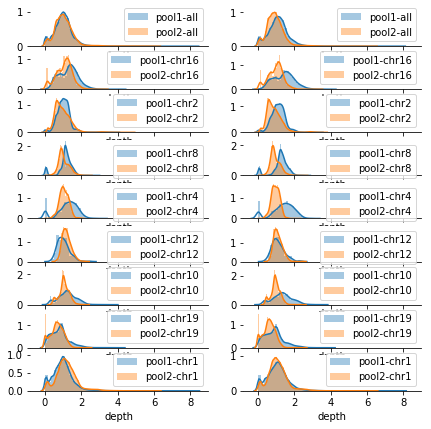

In [5]:
merge_csv1 = pd.read_csv('./demo_data/twopoolmerge.csv')
merge_csv1.columns=['tag','loc','pool','depth']
merge_csv1['chr-temp'] = merge_csv1['loc'].str.split(':')
merge_csv1['chr'] = merge_csv1['chr-temp'].str.get(0)
# print(merge_csv[''])

merge_csv2 = pd.read_csv('./demo_data/onePool.csv')
merge_csv2.columns=['tag','loc','depth','pool']
merge_csv2['chr-temp'] = merge_csv2['loc'].str.split(':')
merge_csv2['chr'] = merge_csv2['chr-temp'].str.get(0)
print('第一列是分pool进行标准化，第二列为不分pool')
compare_plot(merge_csv1,merge_csv2)

Text(1.5,5,'LDLR')

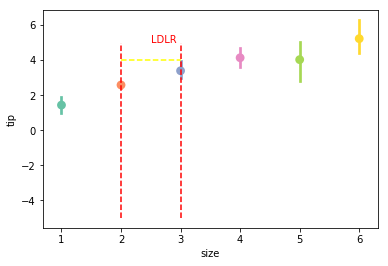

In [6]:
ax = sns.pointplot(x="size",y='tip',data=tips,palette="Set2")
ax.plot([1,1],[-5,5],'--',color='red')
ax.plot([2,2],[-5,5],'--',color='red')
ax.plot([1,2],[4,4],'--',color='yellow')
ax.text(x=1.5,y=5,s='LDLR',color='red')

## Draw pdf or density

In [7]:
def draw_density(data,title,value):
    ax=sns.distplot(data[value],kde=True)
    ax.set_title(title)
    fig = ax.get_figure()
    fig.savefig('./demo_data/hist.png') 

        chr       loc     depth
0  0.914679 -0.169869 -0.330608
1 -1.112941 -1.074785 -1.472770
2  0.356944 -0.572213 -0.103899
3 -2.139968  0.655081  0.625978
4  0.830829  0.044543  0.291289


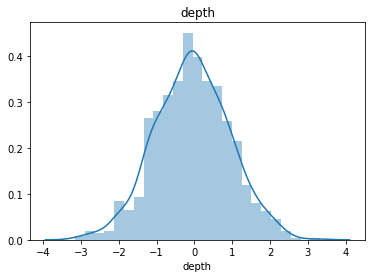

In [8]:
import numpy as np
data=pd.DataFrame(np.random.normal(0,1,(1000,3)),columns=['chr','loc','depth'])
print(data.head())
draw_density(data,'depth','depth')

In [9]:
import statsmodels.api as sm
data=pd.DataFrame(np.random.normal(0,1,(10000,4)),columns=['C','CHH','CG','CHG'])
ecdf = sm.distributions.ECDF(data['C'])
x = np.linspace(min(data['C']), max(data['C']))
y1 = ecdf(x)
ecdf = sm.distributions.ECDF(data['CHH'])
y2 = ecdf(x)
print(y1,y2)

[1.000e-04 1.000e-04 1.000e-04 5.000e-04 7.000e-04 1.200e-03 2.400e-03
 2.900e-03 4.800e-03 7.300e-03 1.100e-02 1.530e-02 2.270e-02 3.140e-02
 4.400e-02 5.900e-02 8.050e-02 1.064e-01 1.331e-01 1.705e-01 2.123e-01
 2.602e-01 3.153e-01 3.763e-01 4.335e-01 4.969e-01 5.537e-01 6.085e-01
 6.671e-01 7.177e-01 7.655e-01 8.112e-01 8.479e-01 8.806e-01 9.105e-01
 9.331e-01 9.493e-01 9.618e-01 9.723e-01 9.805e-01 9.868e-01 9.922e-01
 9.944e-01 9.965e-01 9.975e-01 9.985e-01 9.992e-01 9.996e-01 9.998e-01
 1.000e+00] [2.000e-04 2.000e-04 5.000e-04 9.000e-04 1.200e-03 1.600e-03 2.200e-03
 3.200e-03 4.900e-03 7.100e-03 1.060e-02 1.500e-02 2.280e-02 3.320e-02
 4.500e-02 6.310e-02 8.320e-02 1.066e-01 1.384e-01 1.742e-01 2.172e-01
 2.620e-01 3.143e-01 3.671e-01 4.268e-01 4.887e-01 5.477e-01 6.079e-01
 6.661e-01 7.141e-01 7.600e-01 8.075e-01 8.428e-01 8.777e-01 9.056e-01
 9.318e-01 9.495e-01 9.633e-01 9.742e-01 9.817e-01 9.877e-01 9.912e-01
 9.938e-01 9.958e-01 9.973e-01 9.981e-01 9.988e-01 9.995e-01 9.99

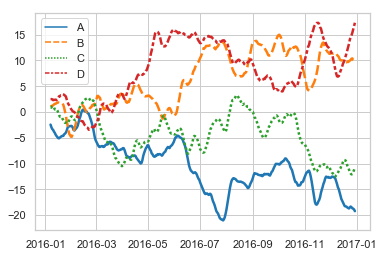

In [10]:
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

## 多种数据类型

看如何合适的表示

In [11]:
mytype = np.random.randint(1,4,20)
mydepth = np.random.randint(2,200,20)
mypercentage=np.random.rand(20)
mycontext = np.random.randint(1,3,20)
print(mytype,mydepth,mypercentage,mycontext)

[1 3 3 2 1 3 3 2 1 1 3 3 3 1 3 1 3 3 2 1] [  3  74  23   9 165  86   2 157  21  90 133  94   2 123  14  22  99  33
 149  11] [0.63478593 0.37510689 0.28591629 0.49394213 0.18069538 0.96470578
 0.24932969 0.4383284  0.68690727 0.98066088 0.04717616 0.88732672
 0.78635715 0.1772392  0.99571558 0.70583588 0.42744007 0.84650104
 0.06487446 0.44631408] [2 2 2 1 1 1 1 2 1 2 2 1 1 1 1 2 2 1 1 1]


In [12]:
pd_data = pd.DataFrame(mytype,columns=['type'])
pd_data['depth']=mydepth
pd_data['percentage']=mypercentage
pd_data['context']=mycontext
print(pd_data)

    type  depth  percentage  context
0      1      3    0.634786        2
1      3     74    0.375107        2
2      3     23    0.285916        2
3      2      9    0.493942        1
4      1    165    0.180695        1
5      3     86    0.964706        1
6      3      2    0.249330        1
7      2    157    0.438328        2
8      1     21    0.686907        1
9      1     90    0.980661        2
10     3    133    0.047176        2
11     3     94    0.887327        1
12     3      2    0.786357        1
13     1    123    0.177239        1
14     3     14    0.995716        1
15     1     22    0.705836        2
16     3     99    0.427440        2
17     3     33    0.846501        1
18     2    149    0.064874        1
19     1     11    0.446314        1


In [13]:
pd_data['context'][pd_data['context'] == 1] = 'CpG'
pd_data['context'][pd_data['context'] == 2] = 'CHH'
pd_data['type'][pd_data['type'] == 1] = 'cgi'
pd_data['type'][pd_data['type'] == 2] = 'promoter'
pd_data['type'][pd_data['type'] == 3] = 'nothing'
print(pd_data)

        type  depth  percentage context
0        cgi      3    0.634786     CHH
1    nothing     74    0.375107     CHH
2    nothing     23    0.285916     CHH
3   promoter      9    0.493942     CpG
4        cgi    165    0.180695     CpG
5    nothing     86    0.964706     CpG
6    nothing      2    0.249330     CpG
7   promoter    157    0.438328     CHH
8        cgi     21    0.686907     CpG
9        cgi     90    0.980661     CHH
10   nothing    133    0.047176     CHH
11   nothing     94    0.887327     CpG
12   nothing      2    0.786357     CpG
13       cgi    123    0.177239     CpG
14   nothing     14    0.995716     CpG
15       cgi     22    0.705836     CHH
16   nothing     99    0.427440     CHH
17   nothing     33    0.846501     CpG
18  promoter    149    0.064874     CpG
19       cgi     11    0.446314     CpG


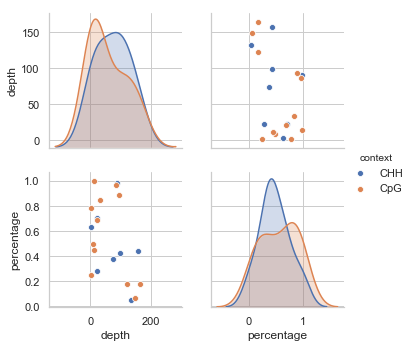

In [14]:
sns.pairplot(pd_data, hue="context")

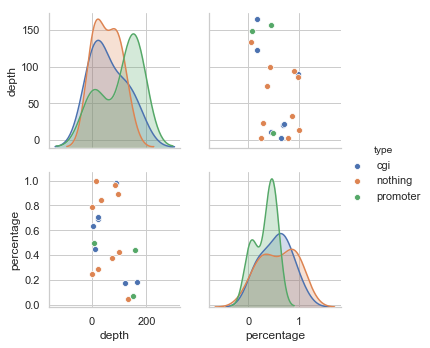

In [15]:
sns.pairplot(pd_data, hue="type")

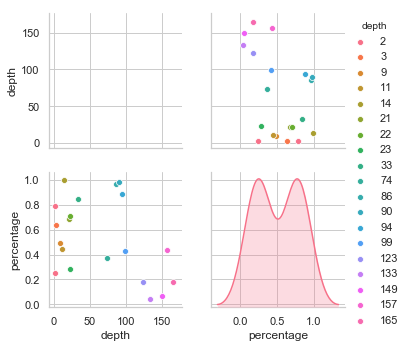

In [17]:
sns.pairplot(pd_data,hue='depth')

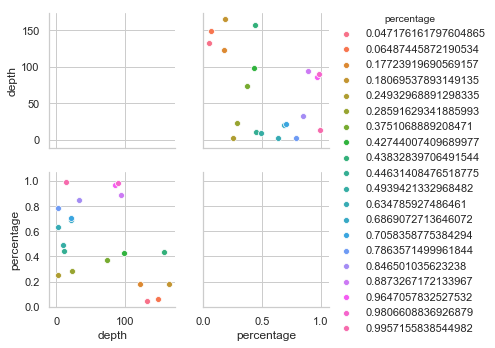

In [18]:
sns.pairplot(pd_data,hue='percentage')

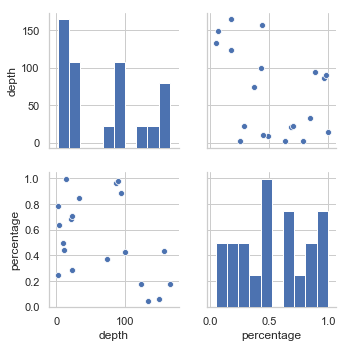

In [19]:
sns.pairplot(pd_data)